# Samsung Innovation
## Python Course

## Chapter 4. Algorithms 1 - Data Structures
### Juana Valentina Mendoza Santamaría 
#### juana.mendoza@usantoto.edu.co
#### March, 2023 

### Notebook contents:

<ol>
  <li>Pair Programming</li>
  <li>Paper Coding
</ol>

<hr>
    <h2>
        <center>
            <strong>
                <font color='blue'>Pair Programming</font>
            </strong>
        </center>
    </h2>
<hr>

### Unit 22. Stack
Thursday, February 23, 2023

<font color='blue'>Q1.</font> Clase y funciones para identificar las etiquetas HTML

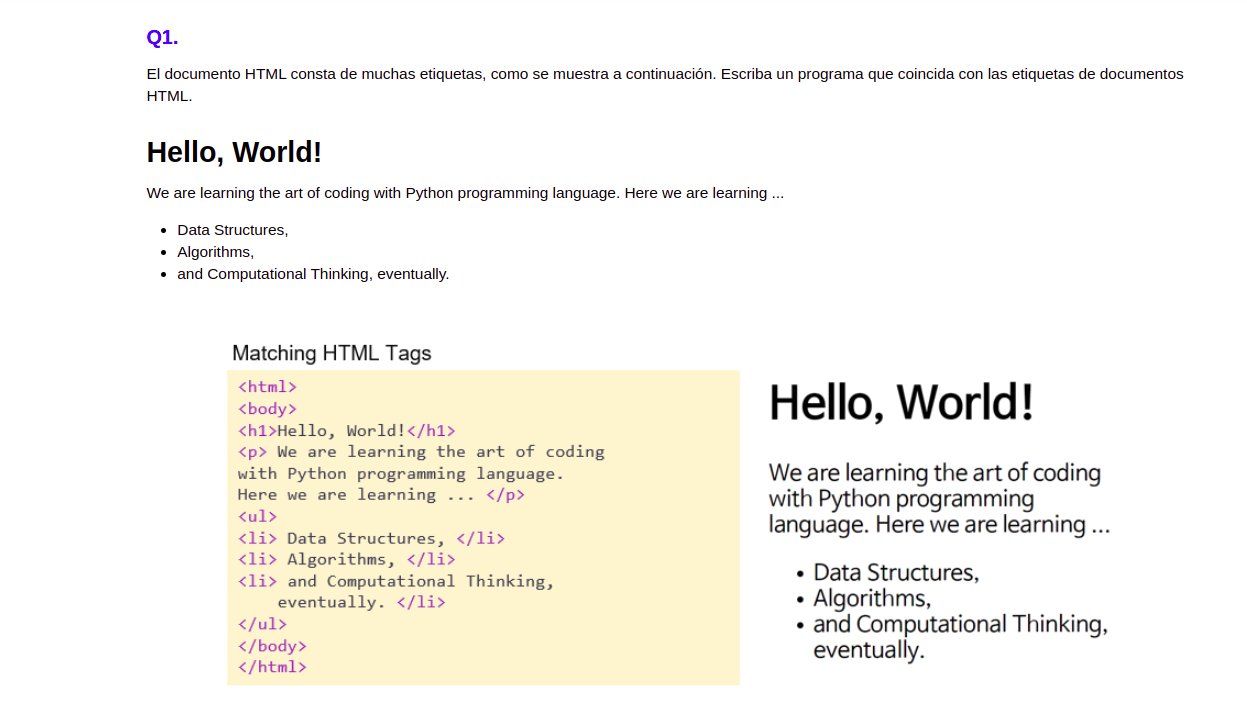

## **TIP**

En Python, el método **find()** se usa para ubicar la posición inicial de la subcadena. Encuentre '<' y '>' para distinguir las etiquetas de documentos HTML.

Si la etiqueta distinguida incluye '/', entonces es una etiqueta abierta y, si no, es una etiqueta cerrada. Verifique la coincidencia de la etiqueta HTML de una manera similar al uso de una pila para hacer coincidir los paréntesis.

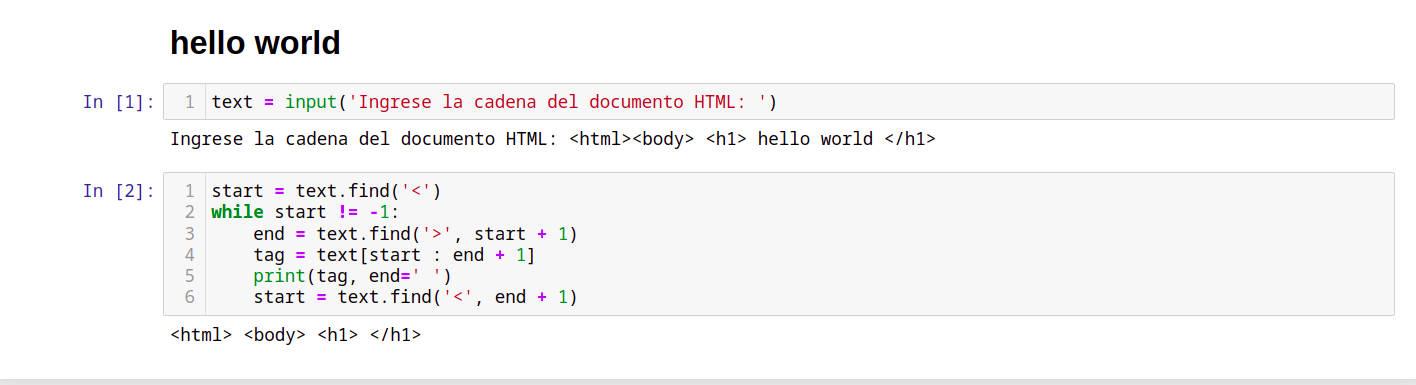

⚠ Nota: Las correcta sintaxis de las etiquetas son:

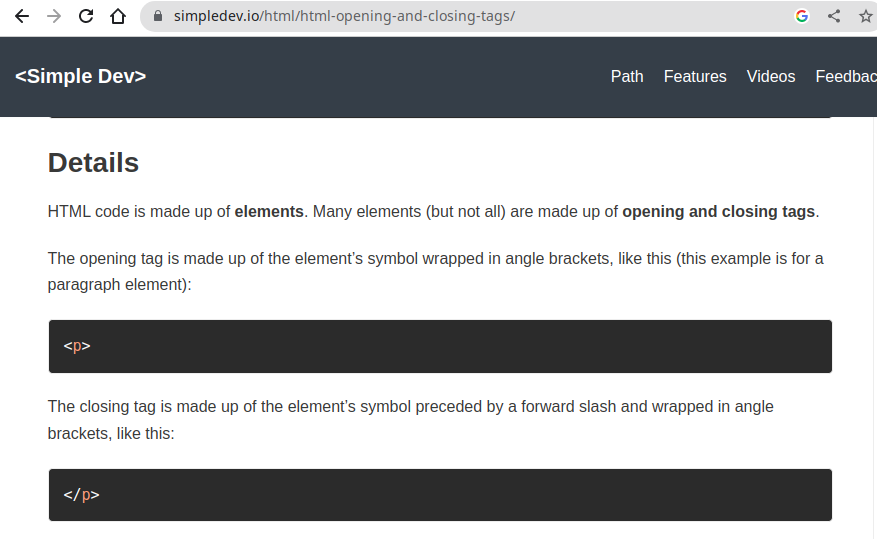

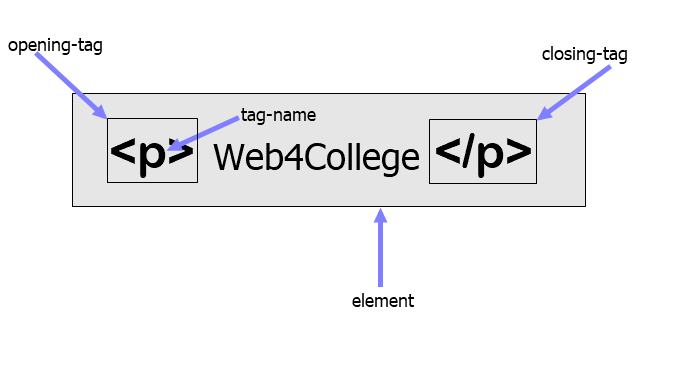

#### 🔍 El ejercicio se desarrolló con base en el código de la unidad 22 de check_parentheses:

In [1]:
class Stack:
    """ Stack Class. 
    """
    def __init__(self):
        """
        Default Constructor.

        Parameters
        ----------
        None.

        Returns
        -------
        None.

        """
        self._stack   = []
        self._tag     = ''

#%%
    @property
    def stack(self):
        """
        Getter for stack list.

        Parameters
        ----------
        None.

        Returns
        -------
        List: Stack list.

        """
        return self._stack
    
    @stack.setter
    def stack(self, stack):
        """
        Setter for stack list.

        Parameters
        ----------
        stack : List
            stack list.

        Returns
        -------
        List: Stack list.

        """
        self._stack = stack

#%%
    def get_tag(self):
        """
        Getter for tag string list.

        Parameters
        ----------
        None.

        Returns
        -------
        String: HTML tag.

        """
        return self._tag
    
    def set_tag(self, tag):
        """
        Setter for tag string.

        Parameters
        ----------
        tag : String
            HTML tag.

        Returns
        -------
        String: HTML tag.

        """
        self._tag = tag

#%%
    def is_empty(self):
        """
        Check if the list has no items.

        Parameters
        ----------
        None.

        Returns
        -------
        boolean: 
            True: The list is empty or
            False: If there are items in the list.
            
        """
        return True if len(self.stack) == 0 else False

#%%
    def push(self, item):
        """
        Add a new item to the stack list.

        Parameters
        ----------
        item: String
            The new item to add to the list.

        Returns
        -------
        None.

        """
        self.stack.append(item)

#%%
    def pop(self):
        """
        Delete the last item entered in the list.

        Parameters
        ----------
        None.

        Returns
        -------
        NoneType: 
            None: If the list is empty
            
        """
        return '' if self.is_empty() else self.stack.pop()

#%%    
    def add_tag(self, item):
        """
        Add the tag name to a string.

        Parameters
        ----------
        item: String
            The new item to add to the string.

        Returns
        -------
        None.

        """
        self.set_tag(self.get_tag() + item)

#%%        
    def build_tag(self, start, end):
        """
        Build the HTML tag.

        Parameters
        ----------
        start: String
            Symbol <.
        end: String
            Symbol >.

        Returns
        -------
        None.

        """
        self.set_tag(start + self.get_tag() + end)

In [2]:
def exist_tag(start, end, char, stack):
    """
    Check if the tag contains the beginning '<' and closing '>' symbols.

    Parameters
    ----------
    start: String
        Symbol <.
    end: String
        Symbol >.
    char: String
        The current character.
    stack: Object
        Stack Class Object.

    Returns
    -------
    boolean: 
        True: It contains the beginning and closing symbols or
        False: It does not contain the beginning and closing symbols.
        
    """
    open_char = stack.pop()
    if start.index(open_char) == end.index(char):
        stack.build_tag(open_char, char)
        return True
    return False

In [3]:
def is_correct_tag(stack):
    """
    Verify that the name of the HTML tag is correct.

    Parameters
    ----------
    stack: Object
        Stack Class Object.

    Returns
    -------
    boolean: 
        True: The HTML tag name is correct or
        False: The HTML tag name is wrong.
        
    """
    tag = stack.get_tag()
    if ' ' in tag or '/>' in tag or len(tag) <= 2 or tag == '/':
        return False
    return True

In [4]:
def find_type(stack):
    """
    Verify the HTML type tag.

    Parameters
    ----------
    stack: Object
        Stack Class Object.

    Returns
    -------
    String: 
        If the HTML tag is close or
        If the HTML tag is open.
        
    """
    return 'Close Tag' if '/' in stack.get_tag() else 'Open Tag'

In [5]:
def build_dict(stack, before, out_result):
    """
    Add the HTML tags as the key and the tag type as the value.

    Parameters
    ----------
    stack: Object
        Stack Class Object.
    before: String
        The character before the current one.
    out_result: Boolean
        Verify if the HTML tag is valid.

    Returns
    -------
    before: 
        The character before the current one. 
    out_result:
        Verify if the HTML tag is valid.
        
    """
    if is_correct_tag(stack):
        name = find_type(stack)
        tags[stack.get_tag()] = name
    else: 
        out_result = False
    before = ''
    stack.set_tag('') 
    return before, out_result

In [6]:
def check_tags(expr, tags):
    """
    Add the HTML tags as the key and the tag type as the value.

    Parameters
    ----------
    expr: String
        The string containing the HTML tags.
    tags: dict
        Dict with HTML tags as the key and the tag type as the value.

    Returns
    -------
    boolean: 
        True: The HTML tag is correct or
        False: The HTML tag is wrong.
        
    """
    start      = '<'
    end        = '>'
    before     = ''
    out_result = False
    stack      = Stack()
    
    for char in expr:
        if char in start:
            stack.push(char) 
            before = char
        elif char in end:
            out_result = exist_tag(start, end, char, stack)
        elif before == '<': 
            stack.add_tag(char)
        if char == '>':
            before, out_result = build_dict(stack, before, out_result)
    return out_result

In [7]:
tags = {}
text = input('⚠ Please, enter the string from the HTML document: ')
print(f'Valid Tags: {tags}' if check_tags(text, tags) else f'The string does not have any HTML tags!')

⚠ Please, enter the string from the HTML document: <html><body> <h1> hello world </h1>
Valid Tags: {'<html>': 'Open Tag', '<body>': 'Open Tag', '<h1>': 'Open Tag', '</h1>': 'Close Tag'}


In [8]:
tags = {}
text = input('Please, enter the string from the HTML document: ')
print(f'Valid Tags: {tags}' if check_tags(text, tags) else f'The string does not have any HTML tags!')

Please, enter the string from the HTML document: <<<<<<h1>> <</h2>> <h1>
Valid Tags: {'<h1>': 'Open Tag', '</h2>': 'Close Tag'}


In [9]:
tags = {}
text = input('⚠ Please, enter the string from the HTML document: ')
print(f'Valid Tags: {tags}' if check_tags(text, tags) else f'The string does not have any HTML tags!')

⚠ Please, enter the string from the HTML document: </h2/> <p/> < > </ >
The string does not have any HTML tags!


#### 🔍 Asimismo, el ejercicio se desarrolló con base en el código del enunciado:

In [10]:
def exist_tag(tag):
    """
    Verify that the label does not have more than one start symbol.

    Parameters
    ----------
    tag: String
        The string containing the HTML tag.

    Returns
    -------
    tag: 
        The string containing the HTML tag.
        
    """
    if tag.count('<') > 1:
       tag = tag.replace('<', '')
       tag = '<' + tag
    return tag

In [11]:
def is_correct_tag(tag):
    """
    Verify that the name of the HTML tag is correct.

    Parameters
    ----------
    tag: String
        The string containing the HTML tag.

    Returns
    -------
    boolean: 
        True: The HTML tag name is correct or
        False: The HTML tag name is wrong.
    tag: 
        The string containing the HTML tag.
        
    """
    tag = exist_tag(tag)
    if ' ' in tag or '/>' in tag or len(tag) <= 2 or tag == '/':
        return False, tag
    return True, tag

In [12]:
def find_type(tag):
    """
    Verify the HTML type tag.

    Parameters
    ----------
    tag: String
        The string containing the HTML tag.

    Returns
    -------
    String: 
        If the HTML tag is close or
        If the HTML tag is open.
        
    """
    return 'Close Tag' if '/' in tag else 'Open Tag'

In [13]:
def build_dict(tag, out_result):
    """
    Add the HTML tags as the key and the tag type as the value.

    Parameters
    ----------
    tag: String
        The string containing the HTML tag.
    out_result:
        Verify if the HTML tag is valid.

    Returns
    -------
    out_result:
        Verify if the HTML tag is valid.
        
    """
    correct, tag = is_correct_tag(tag)
    if correct:
        name = find_type(tag)
        tags[tag] = name
        out_result =  True
    return out_result

In [14]:
def check_tag():
    out_result = False
    start = text.find('<')
    while start != -1:
        end = text.find('>', start + 1)
        tag = text[start : end + 1]
        out_result = build_dict(tag, out_result)
        start = text.find('<', end + 1)
    return out_result

In [15]:
tags = {}
text = input('⚠ Please, enter the string from the HTML document: ')
print(f'Valid Tags: {tags}' if check_tag() else f'The string does not have any HTML tags!')

⚠ Please, enter the string from the HTML document: <html><body> <h1> hello world </h1>
Valid Tags: {'<html>': 'Open Tag', '<body>': 'Open Tag', '<h1>': 'Open Tag', '</h1>': 'Close Tag'}


In [16]:
tags = {}
text = input('⚠ Please, enter the string from the HTML document: ')
print(f'Valid Tags: {tags}' if check_tag() else f'The string does not have any HTML tags!')

⚠ Please, enter the string from the HTML document: <<<<<<h1>> <</h2>> <h1>
Valid Tags: {'<h1>': 'Open Tag', '</h2>': 'Close Tag'}


In [17]:
tags = {}
text = input('⚠ Please, enter the string from the HTML document: ')
print(f'Valid Tags: {tags}' if check_tag() else f'The string does not have any HTML tags!')

⚠ Please, enter the string from the HTML document: </h2/> <p/> < > </ >
The string does not have any HTML tags!


### Unit 23. Queue
Monday, February 27, 2023

<font color='blue'>Q1.</font> Clase para agregar y eliminar los primeros y últimos elementos de una cola

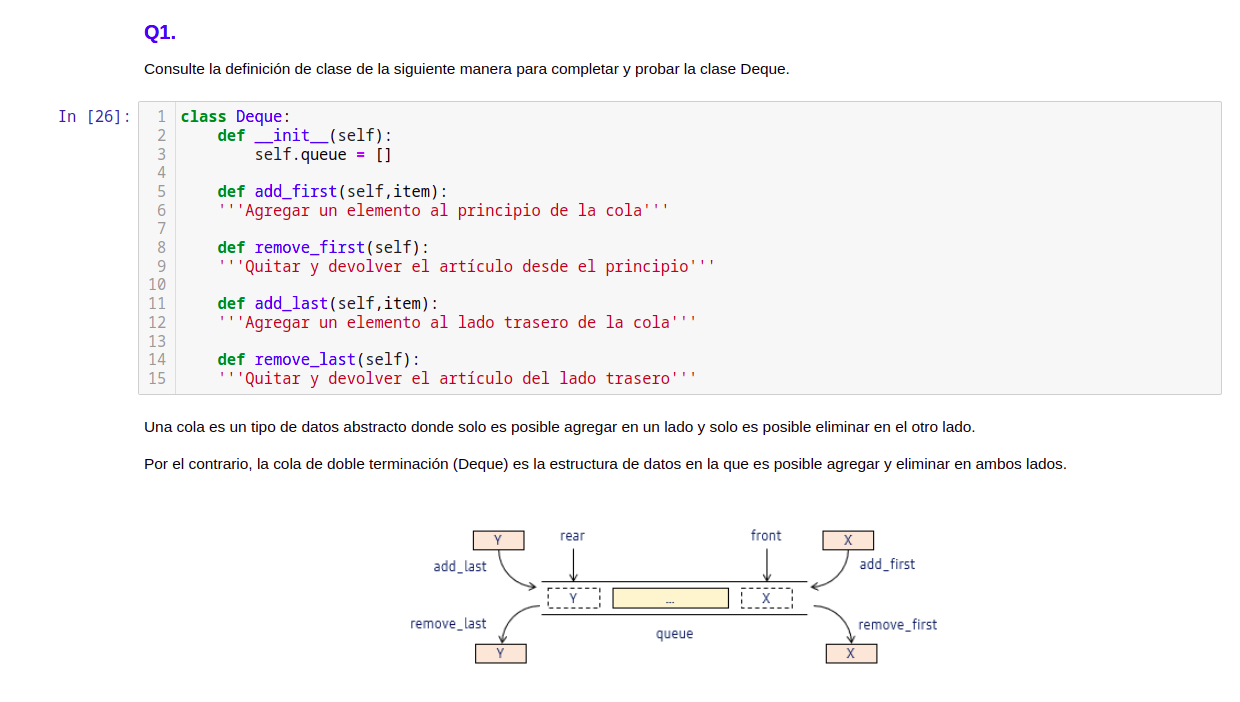

In [18]:
class Deque:
    """ Deque Class. 
    """
#%%
    def __init__(self, queue):
        """
        Default Constructor.

        Parameters
        ----------
        None.

        Returns
        -------
        None.

        """
        self._queue = queue
        
#%%
    @property
    def queue(self):
        """
        Getter for queue list.

        Parameters
        ----------
        None.

        Returns
        -------
        List: Queue list.

        """
        return self._queue
    
    @queue.setter
    def queue(self, queue):
        """
        Setter for queue list.

        Parameters
        ----------
        queue : List
            queue list.

        Returns
        -------
        List: Queue list.

        """
        self._queue = queue
        
    def is_empty(self):
        """
        Check if the list has no items.

        Parameters
        ----------
        None.

        Returns
        -------
        boolean: 
            True: The list is empty or
            False: If there are items in the list.
            
        """
        return True if len(self.queue) == 0 else False
        
#%%        
    def add_first(self, item):
        """
        Add a new element in the first position of the list.

        Parameters
        ----------
        item: String
            The new item to add to the list.

        Returns
        -------
        None.

        """
        print(f'Add {item} in the first position of the list:')
        self.queue.insert(0, item)
  
#%%
    def remove_first(self):
        """
        Delete and return the element in the first position of the list.

        Parameters
        ----------
        None.

        Returns
        -------
        List: The list if The list is empty or
        int: First position of the list if there are items in the list.
        
        """
        print('Remove the first position of the list:')
        return self.queue if self.is_empty() else self.queue.pop(0)
    
     
#%%
    def add_last(self, item):
        """
        Add a new element in the last position of the list.

        Parameters
        ----------
        item: String
            The new item to add to the list.

        Returns
        -------
        None.

        """
        print(f'Add {item} in the last position of the list:')
        self.queue.append(item)
  
#%%
    def remove_last(self):
        """
        Delete and return the element in the last position of the list.

        Parameters
        ----------
        None.

        Returns
        -------
        List: The list if The list is empty or
        int: Last position of the list if there are items in the list.
        
        """
        print('Remove the last position of the list:')
        return self.queue if self.is_empty() else self.queue.pop()

In [19]:
deque = Deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

print(f'List: {deque.queue} \n')
deque.add_first(0)

print(f'List: {deque.queue} \n')
print(deque.remove_first())

print(f'List: {deque.queue} \n')
deque.add_last(11)

print(f'List: {deque.queue} \n')
print(deque.remove_last())

print(f'List: {deque.queue} \n')

List: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Add 0 in the first position of the list:
List: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Remove the first position of the list:
0
List: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Add 11 in the last position of the list:
List: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 

Remove the last position of the list:
11
List: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 



### Unit 24. Sequential Search
Tuesday, February 28, 2023

<font color='blue'>Q1.</font> Función para contar las ocurrencias de una palabra en una frase

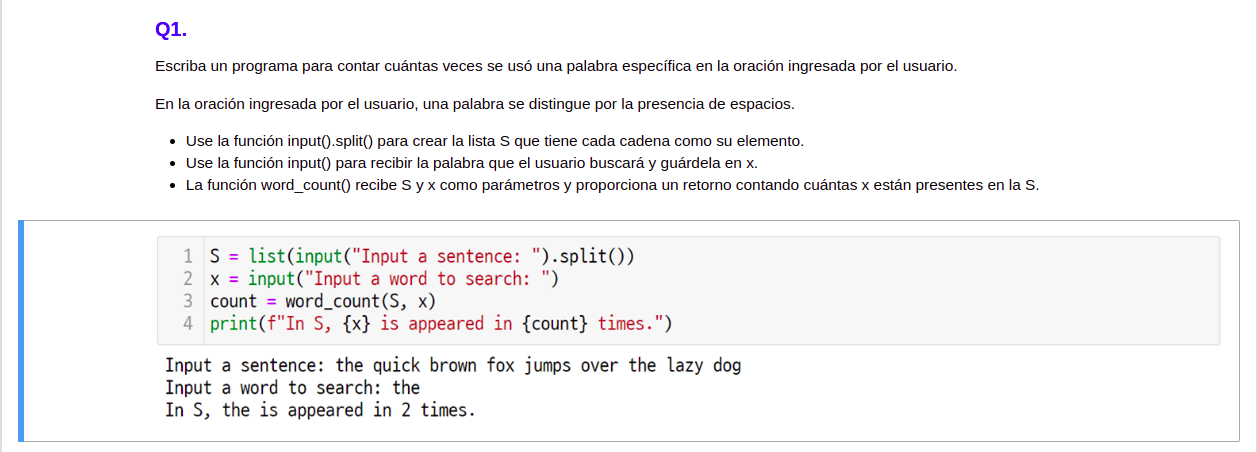

In [20]:
def word_count(sentence, word):
    """
    Count the occurrences of a word in a sentence.

    Parameters
    ----------
    sentece : List
        Sentence to verify the occurrence of the word.
    word : String
        Word to count the occurrences in a phrase.

    Returns
    -------
    int:
        The occurrences of a word in a sentence.

    """
    s = [word.lower() for word in sentence]
    return s.count(word.lower())

✅ Example: Peter Piper picked a peck of pickled peppers. A peck of pickled peppers Peter Piper picked. If Peter Piper picked a peck of pickled peppers. Where’s the peck of pickled peppers Peter Piper picked?

✅ Word: Peter

🖥️ Output: 4 occurences

In [21]:
sentence = list(input('⚠ Please, enter a sentence: ').split())
print('\n')
word     = input('⚠ Please, enter the word to search for: ')
count    = word_count(sentence, word)
print('\n')
print(f'In the FROM list, the letter {word} occurs {count} times.')

⚠ Please, enter a sentence: Peter Piper picked a peck of pickled peppers. A peck of pickled peppers Peter Piper picked. If Peter Piper picked a peck of pickled peppers. Where’s the peck of pickled peppers Peter Piper picked?


⚠ Please, enter the word to search for: Peter


In the FROM list, the letter Peter occurs 4 times.


✅ Example: Peter Piper picked a peck of pickled peppers. A peck of pickled peppers Peter Piper picked. If Peter Piper picked a peck of pickled peppers. Where’s the peck of pickled peppers Peter Piper picked?

✅ Word: peck

🖥️ Output: 4 occurences

In [22]:
sentence = list(input('⚠ Please, enter a sentence: ').split())
print('\n')
word     = input('⚠ Please, enter the word to search for: ')
count    = word_count(sentence, word)
print('\n')
print(f'In the FROM list, the letter {word} occurs {count} times.')

⚠ Please, enter a sentence: Peter Piper picked a peck of pickled peppers. A peck of pickled peppers Peter Piper picked. If Peter Piper picked a peck of pickled peppers. Where’s the peck of pickled peppers Peter Piper picked?


⚠ Please, enter the word to search for: peck


In the FROM list, the letter peck occurs 4 times.


### Unit 25. Binary Search 
Wednesday, March 01, 2023

<font color='blue'>Q1.</font> Función para encontrar la posición dónde agregar un número.

✅ Using the **.index()** method 

In [23]:
def search_insert_position(nums, x):
    """
    Find in which position a number should be entered in an ordered list.

    Parameters
    ----------
    nums : List
        Ordered list of numbers.
    x : int
        Number to add to the list.

    Returns
    -------
    int: Position to add the number to the list.

    """
    for i in nums:
        if x <= i:
            return nums.index(i)

✅ Number: 25

🖥️ Output: position is 2

In [24]:
nums = [10, 20, 40, 50, 60, 80]

x    = int(input('⚠ Please, enter the number to add: '))
pos  = search_insert_position(nums, x)
print(f'The number {x} is entered in position {pos} of the list:')

# Add a new value at a specific position in the list.
nums.insert(pos, x)
print(nums)

⚠ Please, enter the number to add: 25
The number 25 is entered in position 2 of the list:
[10, 20, 25, 40, 50, 60, 80]


✅ Using a for loop with **enumerate()**

In [25]:
def search_insert_position(nums, x):
    """
    Find in which position a number should be entered in an ordered list.

    Parameters
    ----------
    nums : List
        Ordered list of numbers.
    x : int
        Number to add to the list.

    Returns
    -------
    int: Position to add the number to the list.

    """
    for pos, ind in enumerate(nums):
        if x <= ind:
            return pos

✅ Number: 25

🖥️ Output: position is 2

In [26]:
nums = [10, 20, 40, 50, 60, 80]

x    = int(input('⚠ Please, enter the number to add: '))
pos  = search_insert_position(nums, x)
print(f'The number {x} is entered in position {pos} of the list:')

# Add a new value at a specific position in the list.
nums.insert(pos, x)
print(nums)

⚠ Please, enter the number to add: 25
The number 25 is entered in position 2 of the list:
[10, 20, 25, 40, 50, 60, 80]


### Unit 26. Hash Table 
Thursday, March 02, 2023

<font color='blue'>Q1.</font> Clase HashTable para generar la clave hash de una cadena.

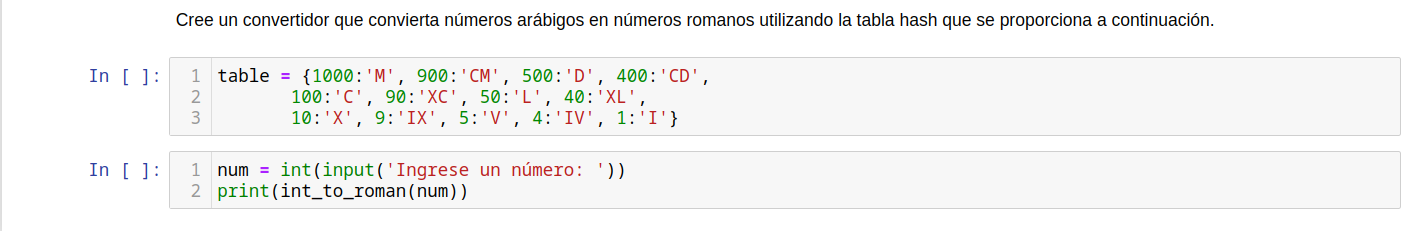

In [27]:
table = {
    1000 : 'M', 
    900  : 'CM', 
    500  : 'D', 
    400  : 'CD',
    100  : 'C', 
    90   : 'XC', 
    50   : 'L', 
    40   : 'XL', 
    10   : 'X', 
    9    : 'IX', 
    5    : 'V', 
    4    : 'IV', 
    1    : 'I'
}

✅ Convert Decimal numbers to Roman numerals.

In [28]:
def int_to_roman(decimal):
    """
    Convert Decimal numbers to Roman numerals.
    
    Parameters
    ----------
    decimal: int
        The decimal number.
    
    Returns
    -------
    String: Roman numerals.
    
    """
    result = ''
    for key, value in table.items():
        while decimal >= key:
            result += value
            decimal -= key
        if decimal == 0:
            break
    return result

✅ Decimal: 25

🖥️ Output: MMXXIII

In [29]:
decimal = int(input('⚠ Please, enter the number to convert: '))
print(f'The decimal number {decimal} in roman numerals is: {int_to_roman(decimal)}')

⚠ Please, enter the number to convert: 25
The decimal number 25 in roman numerals is: XXV


✅ Decimal: 1606

🖥️ Output: MDCVI

In [30]:
decimal = int(input('⚠ Please, enter the number to convert: '))
print(f'The decimal number {decimal} in roman numerals is: {int_to_roman(decimal)}')

⚠ Please, enter the number to convert: 1606
The decimal number 1606 in roman numerals is: MDCVI


✅ Decimal: 1999

🖥️ Output: MCMXCIX

In [31]:
decimal = int(input('⚠ Please, enter the number to convert: '))
print(f'The decimal number {decimal} in roman numerals is: {int_to_roman(decimal)}')

⚠ Please, enter the number to convert: 1999
The decimal number 1999 in roman numerals is: MCMXCIX


✅ Decimal: 19

🖥️ Output: XIX

In [32]:
decimal = int(input('⚠ Please, enter the number to convert: '))
print(f'The decimal number {decimal} in roman numerals is: {int_to_roman(decimal)}')

⚠ Please, enter the number to convert: 19
The decimal number 19 in roman numerals is: XIX


✅ Decimal: 21

🖥️ Output: XXI

In [33]:
decimal = int(input('⚠ Please, enter the number to convert: '))
print(f'The decimal number {decimal} in roman numerals is: {int_to_roman(decimal)}')

⚠ Please, enter the number to convert: 21
The decimal number 21 in roman numerals is: XXI


✅ Convert Roman numerals to Decimal numbers.

In [34]:
def roman_to_int(roman):
    """
    Convert Roman numerals to Decimal numbers.
    
    Parameters
    ----------
    roman: String
        Roman numerals.
    
    Returns
    -------
    int: The decimal number.
    
    """
    result = 0
    for key, value in table.items():
        while roman.startswith(value):
            result += key
            roman = roman[len(value):]
        if len(roman) == 0:
            break
    return result

✅ Roman: MMXXIII

🖥️ Output: 2023

In [35]:
roman = input('⚠ Please, enter the number to convert: ')
print(f'The roman numerals {roman} in decimal number is: {roman_to_int(roman)}')

⚠ Please, enter the number to convert: MMXXIII
The roman numerals MMXXIII in decimal number is: 2023


✅ Roman: MDCVI

🖥️ Output: 1606

In [36]:
roman = input('⚠ Please, enter the number to convert: ')
print(f'The roman numerals {roman} in decimal number is: {roman_to_int(roman)}')

⚠ Please, enter the number to convert: MDCVI
The roman numerals MDCVI in decimal number is: 1606


✅ Roman: MCMXCIX

🖥️ Output: 1999

In [37]:
roman = input('⚠ Please, enter the number to convert: ')
print(f'The roman numerals {roman} in decimal number is: {roman_to_int(roman)}')

⚠ Please, enter the number to convert: MCMXCIX
The roman numerals MCMXCIX in decimal number is: 1999


✅ Roman: XIX

🖥️ Output: 19

In [38]:
roman = input('⚠ Please, enter the number to convert: ')
print(f'The roman numerals {roman} in decimal number is: {roman_to_int(roman)}')

⚠ Please, enter the number to convert: XIX
The roman numerals XIX in decimal number is: 19


✅ Roman: XXI

🖥️ Output: 21

In [39]:
roman = input('⚠ Please, enter the number to convert: ')
print(f'The roman numerals {roman} in decimal number is: {roman_to_int(roman)}')

⚠ Please, enter the number to convert: XXI
The roman numerals XXI in decimal number is: 21


<hr>
    <h2>
        <center>
            <strong>
                <font color='blue'>Paper Coding</font>
            </strong>
        </center>
    </h2>
<hr>

### Unit 22. Stack
Thursday, February 23, 2023

<font color='blue'>Q1.</font> Clase para entender el funcionamiento de una pila.

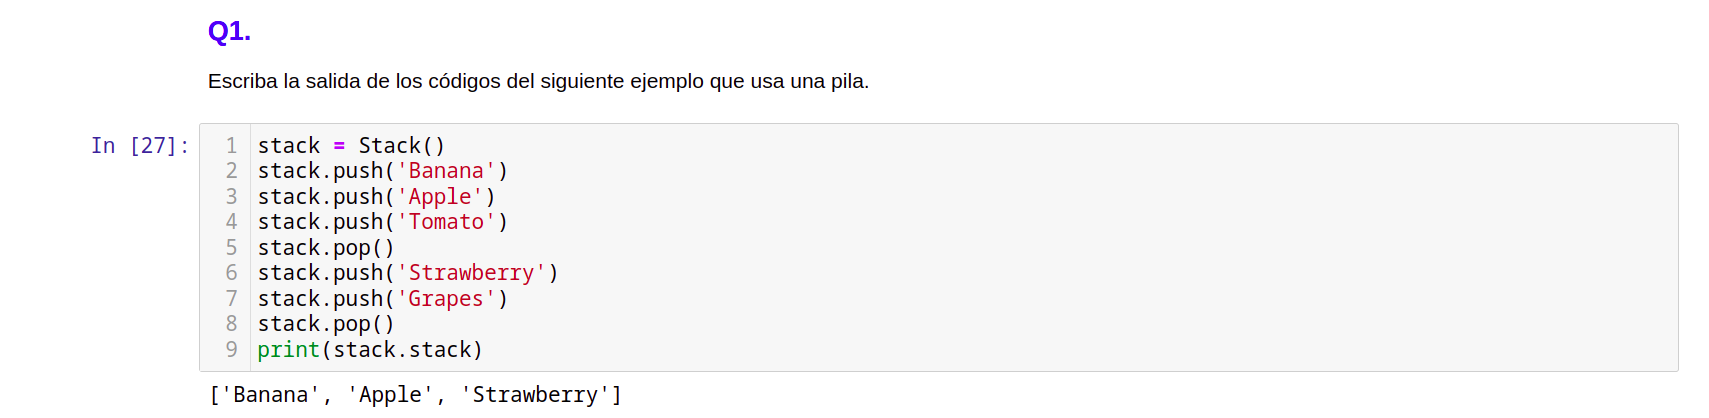

In [40]:
class Stack:
    """ Stack Class. 
    """
#%%
    def __init__(self):
        """
        Default Constructor.

        Parameters
        ----------
        None.

        Returns
        -------
        None.

        """
        self._stack = []

#%%
    @property
    def stack(self):
        """
        Getter for stack list.

        Parameters
        ----------
        None.

        Returns
        -------
        List: Stack list.

        """
        return self._stack
    
    @stack.setter
    def stack(self, stack):
        """
        Setter for stack list.

        Parameters
        ----------
        stack : List
            Stack list.

        Returns
        -------
        List: Stack list.

        """
        self._stack = stack
        
#%%
    def is_empty(self):
        """
        Check if the list has no items.

        Parameters
        ----------
        None.

        Returns
        -------
        boolean: 
            True: The list is empty or
            False: If there are items in the list.
            
        """
        return True if len(self.stack) == 0 else False

#%%
    def push(self, item):
        """
        Add a new item to the stack list.

        Parameters
        ----------
        item: String
            The new item to add to the list.

        Returns
        -------
        None.

        """
        self.stack.append(item)

#%%
    def pop(self):
        """
        Delete the last item entered in the list.

        Parameters
        ----------
        None.

        Returns
        -------
        NoneType: 
            None: If the list is empty
            
        """
        return None if self.is_empty() else self.stack.pop()

In [41]:
# Create an object from Stack Class.
stack = Stack()

# Add new items to the stack list.
stack.push('Banana')
print(stack.stack)
stack.push('Apple')
print(stack.stack)
stack.push('Tomato')
print(stack.stack)

# Removes the last item from the stack list.
stack.pop()
print(stack.stack)

# Add new items to the stack list.
stack.push('Strawberry')
print(stack.stack)
stack.push('Grapes')
print(stack.stack)

# Removes the last item from the stack list.
stack.pop()
print(stack.stack)

# Show the stack list by the getter function.
print(stack.stack)

['Banana']
['Banana', 'Apple']
['Banana', 'Apple', 'Tomato']
['Banana', 'Apple']
['Banana', 'Apple', 'Strawberry']
['Banana', 'Apple', 'Strawberry', 'Grapes']
['Banana', 'Apple', 'Strawberry']
['Banana', 'Apple', 'Strawberry']


<h3><font color='blue'>Graphic representation:</font></h3>

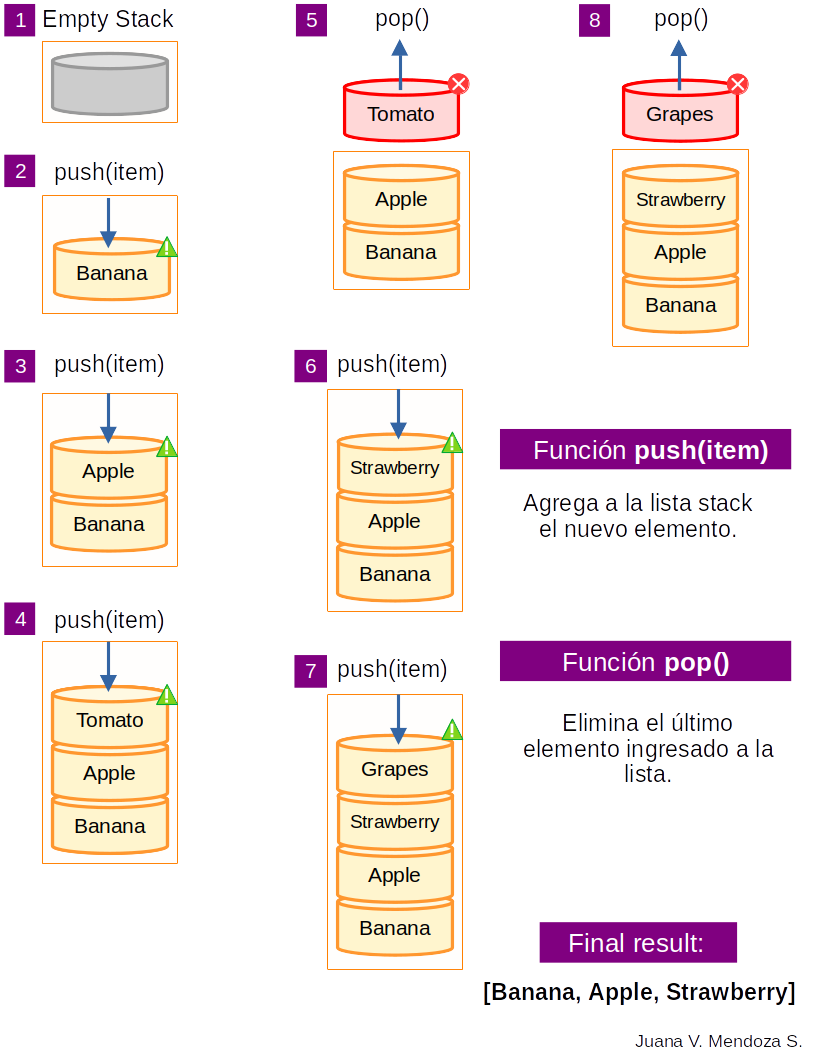

<font color='blue'>Q2.</font> Clase para agregar y eliminar los primeros elementos de una pila.

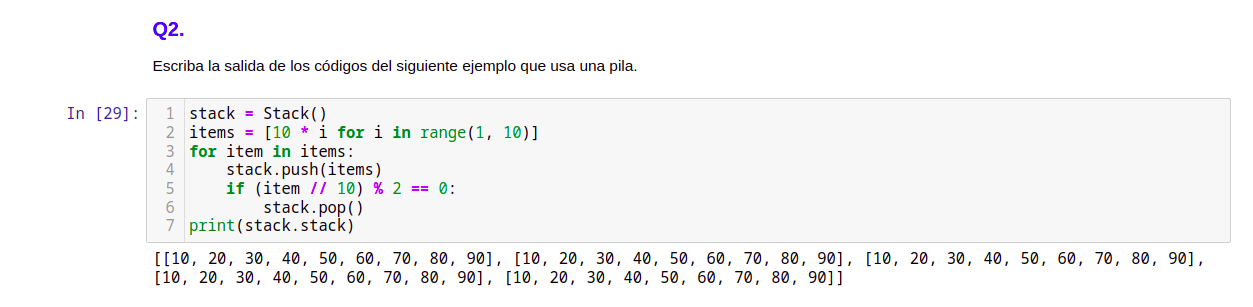

⚠ Nota: Se realizó la corrección en el código en la línea 4 push(items) por push(item). Adicionalmente, no es necesario utilizar la operación floor division, ya que en este caso, da el mismo resultado que una división:

In [42]:
print(10 / 10 % 2 == 10 // 10 % 2)
print(20 / 10 % 2 == 20 // 10 % 2)
print(30 / 10 % 2 == 30 // 10 % 2)
print(40 / 10 % 2 == 40 // 10 % 2)
print(50 / 10 % 2 == 50 // 10 % 2)
print(60 / 10 % 2 == 60 // 10 % 2)
print(70 / 10 % 2 == 70 // 10 % 2)
print(80 / 10 % 2 == 80 // 10 % 2)
print(90 / 10 % 2 == 90 // 10 % 2)

True
True
True
True
True
True
True
True
True


In [43]:
# Create an object from Stack Class.
stack = Stack()

# Fill a list with the numbers from 1 to 90 by 10 by 10.
items = [10 * i for i in range(1, 10)]
print(f'Numbers from 10 to 90: {items} \n')

print('Filter:')
for item in items:
    stack.push(item)
    if item / 10 % 2 == 0: # If the number is divisible by 2.
        stack.pop()        # Remove the last number from the list.
        print(stack.stack)
        
print(stack.stack)

Numbers from 10 to 90: [10, 20, 30, 40, 50, 60, 70, 80, 90] 

Filter:
[10]
[10, 30]
[10, 30, 50]
[10, 30, 50, 70]
[10, 30, 50, 70, 90]


<h3><font color='blue'>Graphic representation:</font></h3>

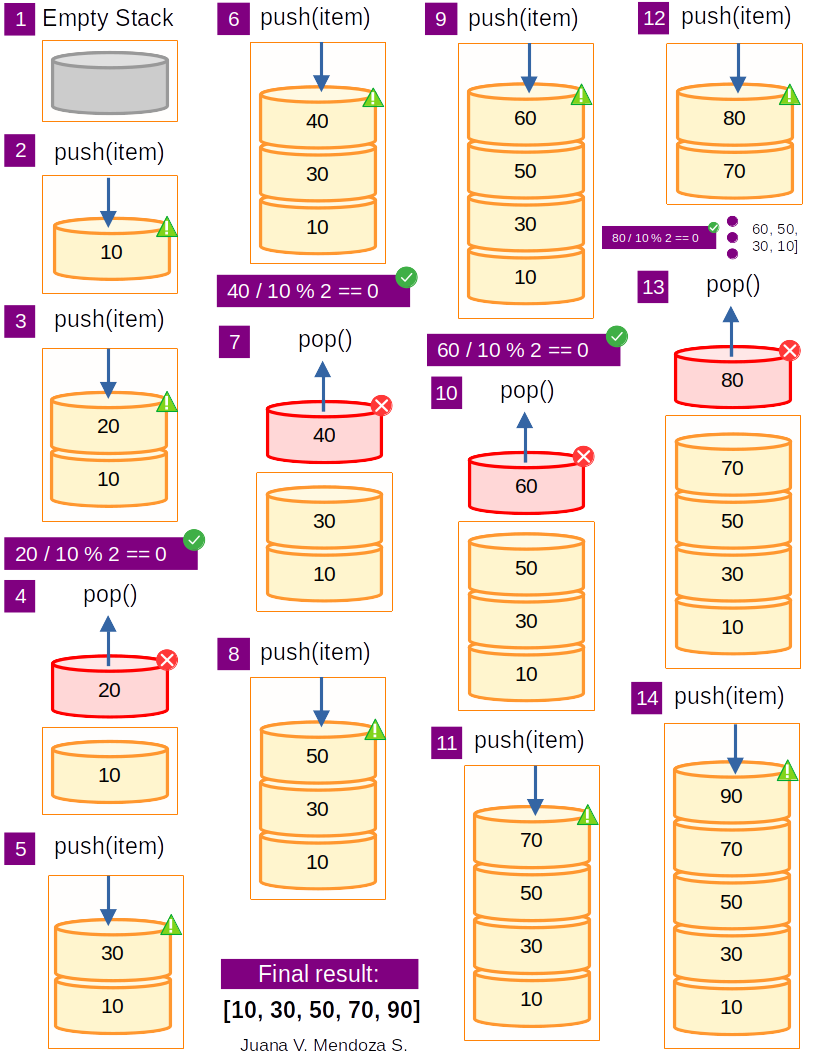

### Unit 23. Queue
Monday, February 27, 2023

<font color='blue'>Q1.</font> Clase para entender el funcionamiento de una cola.

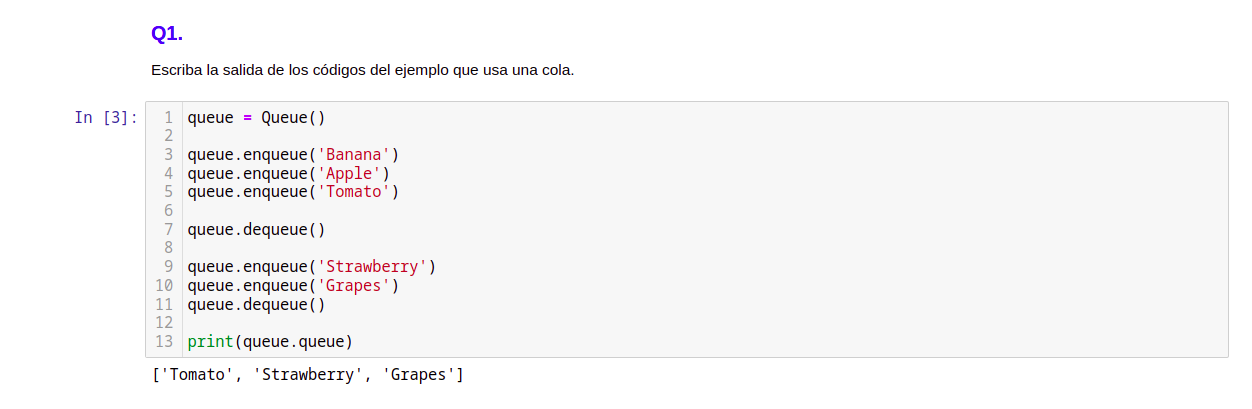

In [44]:
class Queue():
    """ Queue Class. 
    """
#%%
    def __init__(self):
        """
        Default Constructor.

        Parameters
        ----------
        None.

        Returns
        -------
        None.

        """
        self._queue = []

#%%
    @property
    def queue(self):
        """
        Getter for queue list.

        Parameters
        ----------
        None.

        Returns
        -------
        List: Queue list.

        """
        return self._queue
    
    @queue.setter
    def queue(self, queue):
        """
        Setter for queue list.

        Parameters
        ----------
        queue : List
            queue list.

        Returns
        -------
        List: Queue list.

        """
        self._queue = queue

#%%        
    def is_empty(self):
        """
        Check if the list has no items.

        Parameters
        ----------
        None.

        Returns
        -------
        boolean: 
            True: The list is empty or
            False: If there are items in the list.
            
        """
        return True if len(self.queue) == 0 else False

#%%    
    def enqueue(self, item):
        """
        Add a new item to the queue list.

        Parameters
        ----------
        item: String
            The new item to add to the list.

        Returns
        -------
        None.

        """
        self.queue.append(item)

#%%        
    def dequeue(self):
        """
        Delete the last item entered in the list.

        Parameters
        ----------
        None.

        Returns
        -------
        NoneType: 
            None: If the list is empty
            
        """
        return None if self.is_empty() else self.queue.pop(0)

#%%    
    def size(self):
        """
        Check list length.

        Parameters
        ----------
        None.

        Returns
        -------
        int: List lenght.
        
        """
        return len(self.queue)

In [45]:
# Create an object from Queue Class.
queue = Queue()

# Add new items to the queue list.
queue.enqueue('Banana')
print(queue.queue)
queue.enqueue('Apple')
print(queue.queue)
queue.enqueue('Tomato')
print(queue.queue)

# Removes the last item from the queue list.
queue.dequeue()
print(queue.queue)

# Add new items to the queue list.
queue.enqueue('Strawberry')
print(queue.queue)
queue.enqueue('Grapes')
print(queue.queue)

# Removes the last item from the queue list.
queue.dequeue()
print(queue.queue)

['Banana']
['Banana', 'Apple']
['Banana', 'Apple', 'Tomato']
['Apple', 'Tomato']
['Apple', 'Tomato', 'Strawberry']
['Apple', 'Tomato', 'Strawberry', 'Grapes']
['Tomato', 'Strawberry', 'Grapes']


<h3><font color='blue'>Graphic representation:</font></h3>

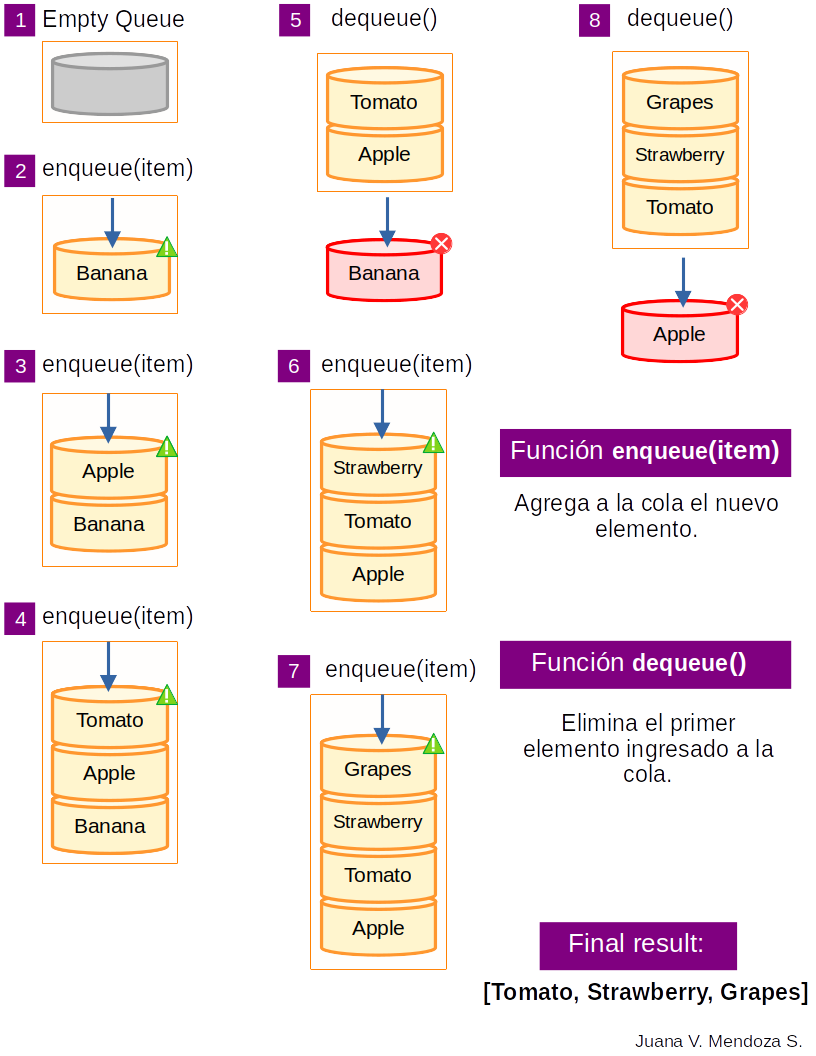

<font color='blue'>Q2.</font> Clase para agregar y eliminar los primeros elementos de una cola.

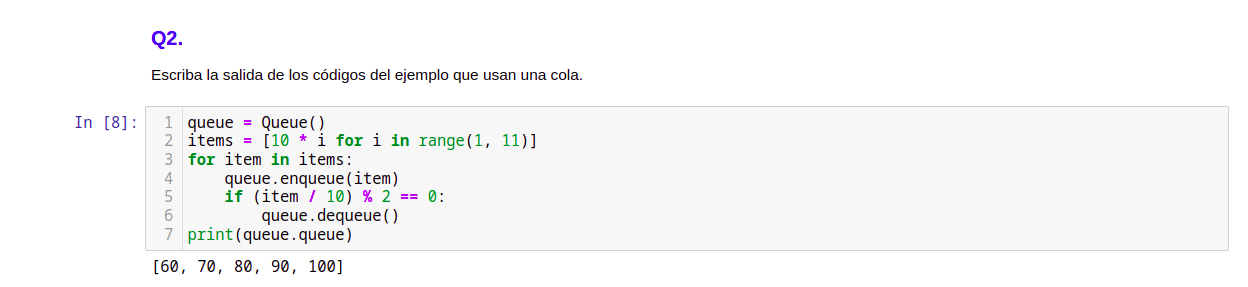

In [46]:
# Create an object from Queue Class.
queue = Queue()

# Fill a list with the numbers from 1 to 100 by 10 by 10.
items = [10 * i for i in range(1, 11)]
print(f'Numbers from 1 to 10: {items} \n')

print('Filter:')
for item in items:
    queue.enqueue(item)
    if (item / 10) % 2 == 0: # If the number is divisible by 2.
        print(queue.queue)
        queue.dequeue()      # Remove the first number from the list.
        
print(queue.queue)

Numbers from 1 to 10: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 

Filter:
[10, 20]
[20, 30, 40]
[30, 40, 50, 60]
[40, 50, 60, 70, 80]
[50, 60, 70, 80, 90, 100]
[60, 70, 80, 90, 100]


<h3><font color='blue'>Graphic representation:</font></h3>

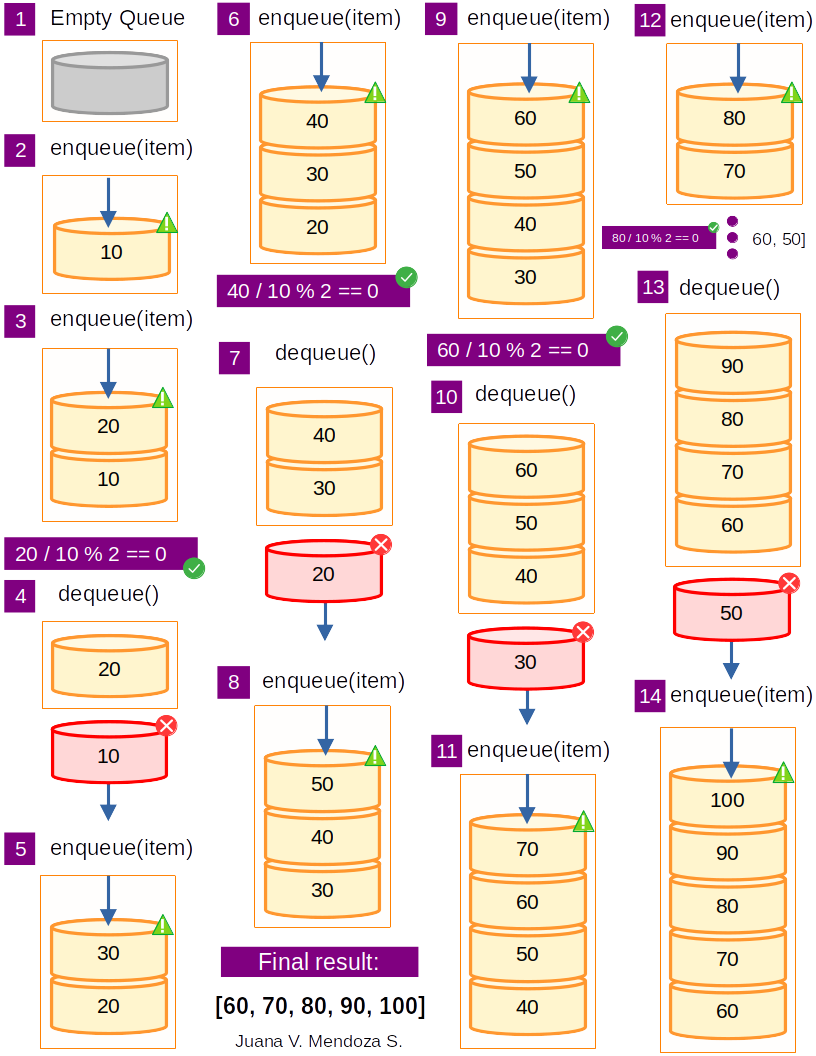

### Unit 24. Sequential Search
Tuesday, February 28, 2023

<font color='blue'>Q1.</font> Función para obtener el número mayor y menor de una lista

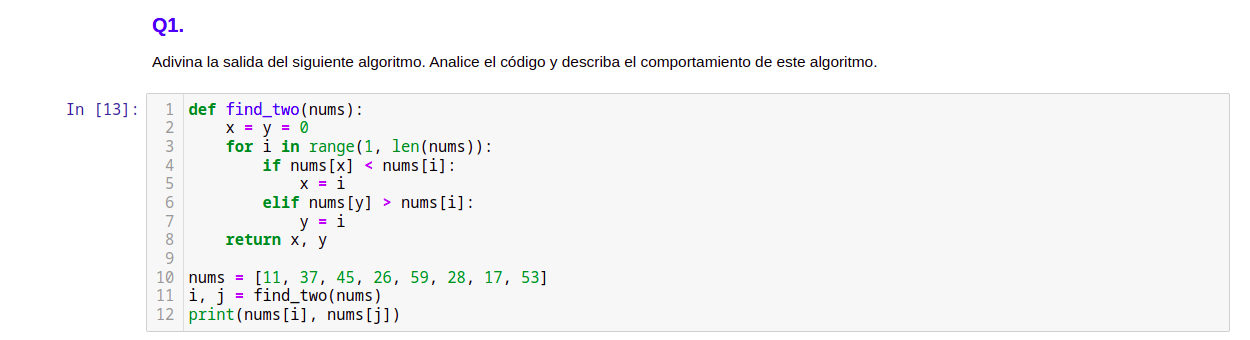

In [47]:
def find_two(nums):
    """
    Find the largest and smallest number in a list.

    Parameters
    ----------
    nums: List
        Numbers list.

    Returns
    -------
    x: int
        The largest number on the list.
    y: int
        The smallest number on the list.
        
    """ 
    x = y = 0                      # Zero is for getting the first number in the list.
    for i in range(1, len(nums)):  # Loop the list from position 1.
        if nums[x] < nums[i]:      # Is the largest number?
            x = i                  # Save the largest number.
        elif nums[y] > nums[i]:    # Is the smallest number?
            y = i                  # Save the smallest number.
    return x, y                    # Return the largest and smallest number.

In [48]:
nums = [11, 37, 45, 26, 59, 28, 17, 53]
i, j = find_two(nums)
print(nums[i], nums[j])

59 11


El objetivo del anterior programa consiste en obtener el número mayor y el número menor de una lista proporcionada. Para ello, se implementa el algoritmo secuencial, que consiste en comprobar cada uno de los elementos en el orden que se encuentren con un valor. En este caso los valores a comparar son **x** y **y**, que corresponden al valor de la posición **cero** de la lista. El ciclo que se utiliza parte desde la posición **1** (valor 37) hasta el **final** de la lista. Se tienen dos condicionales: el primero pregunta por el número **más grande** y el segundo por el número **más pequeño**. El primer condicional al encontrar un número **mayor al actual (x)**, reemplaza el valor de **x** por el número **mayor**. Por otra parte, si no se cumple el primer condicional se dará continuidad al segundo condicional; el cúal al encontrar un número **menor** que el **actual (y)**, reemplaza el valor de **y** por el número **menor**. De esta forma al final de la iteración, se obtendrán los dos valores, como se puede apreciar en la siguiente imagen:

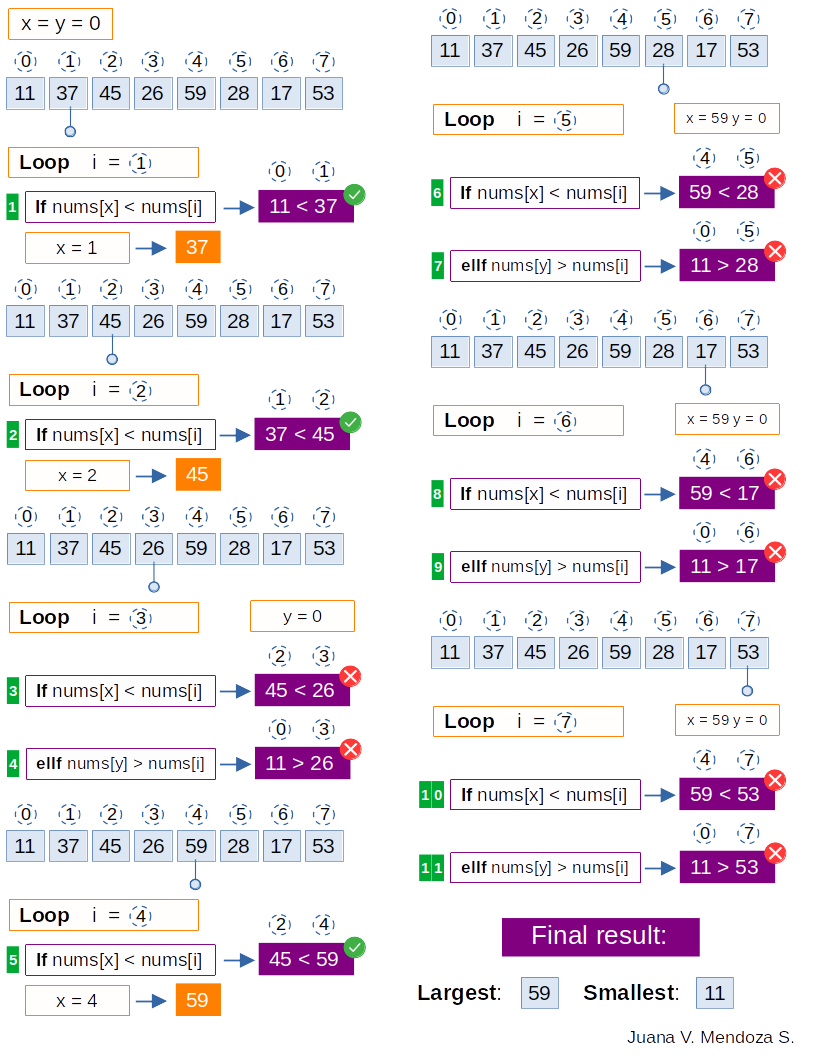

### <FONT COLOR="blue">**Q2.** </FONT>

¿Cuántas comparaciones se deben hacer para find_two() que se implementó en el quiz #1?

#### Respuesta:

Como se puede apreciar en la anterior imagen, el código realizó **once** comparaciones, de las cuales, sólo **tres** condicionales fueron correctos. 

### Unit 25. Binary Search 
Wednesday, March 01, 2023

<font color='blue'>Q1.</font> Programa para contar cuántas veces se demora en adivinar un número, que se encuentra entre 1 y 100.

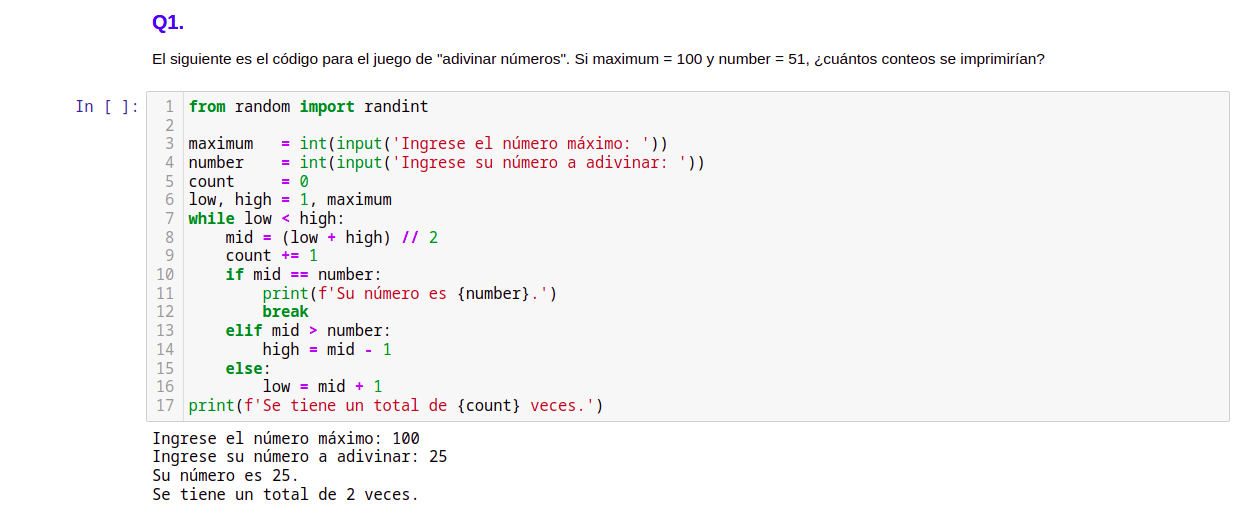

In [49]:
def guess_number(maximum, number):
    """
    Count how many times it takes to guess a number between 1 and 100.

    Parameters
    ----------
    maximum: int
        The largest number on the list.
    number: int
        The number to guess.

    Returns
    -------
    count: int
        The times it takes to guess a number.
        
    """ 
    low, high, count = 1, maximum, 0
    while low < high:
        middle = (low + high) // 2
        count += 1
        if middle == number:
            print(f'Your number is {number}.')
            break
        elif middle > number:
            high = middle - 1
        else:
            low = middle + 1
    return count

✅ Maximum: 100

✅ Number: 51

🖥️ Output: 6 counts

In [50]:
maximum = int(input('⚠ Please, enter the maximum number: '))
number  = int(input('⚠ Please, enter the number to guess: '))

print(f'There are a total of {guess_number(maximum, number)} counts.')

⚠ Please, enter the maximum number: 100
⚠ Please, enter the number to guess: 51
Your number is 51.
There are a total of 6 counts.


<h3><font color='blue'>Graphic representation:</font></h3>

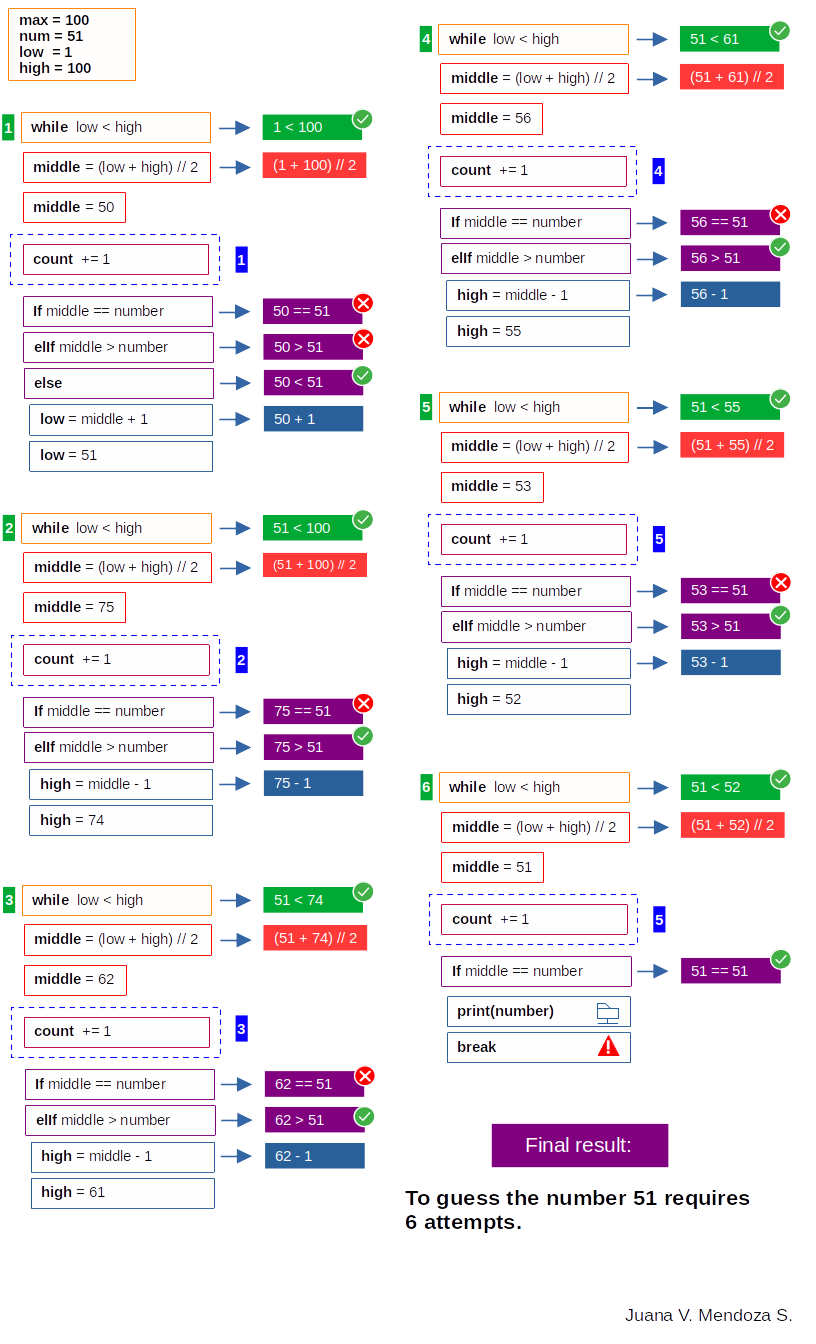

<font color='blue'>Q2.</font> Programa para contar cuántas veces se demora en adivinar un número, que se encuentra entre 1 y 100.

Si el máximo = 100 y el número = 25 en el juego de adivinanzas, ¿cuántos conteos se imprimirán?

In [51]:
def guess_number(maximum, number):
    """
    Count how many times it takes to guess a number between 1 and 100.

    Parameters
    ----------
    maximum: int
        The largest number on the list.
    number: int
        The number to guess.

    Returns
    -------
    count: int
        The times it takes to guess a number.
        
    """ 
    low, high, count = 1, maximum, 0
    while low < high:
        middle = (low + high) // 2
        count += 1
        if middle == number:
            print(f'Your number is {number}.')
            break
        elif middle > number:
            high = middle - 1
        else:
            low = middle + 1
    return count

✅ Maximum: 100

✅ Number: 25

🖥️ Output: 2 counts

In [52]:
maximum = int(input('⚠ Please, enter the maximum number: '))
number  = int(input('⚠ Please, enter the number to guess: '))
print(f'There are a total of {guess_number(maximum, number)} counts.')

⚠ Please, enter the maximum number: 100
⚠ Please, enter the number to guess: 25
Your number is 25.
There are a total of 2 counts.


<h3><font color='blue'>Graphic representation:</font></h3>

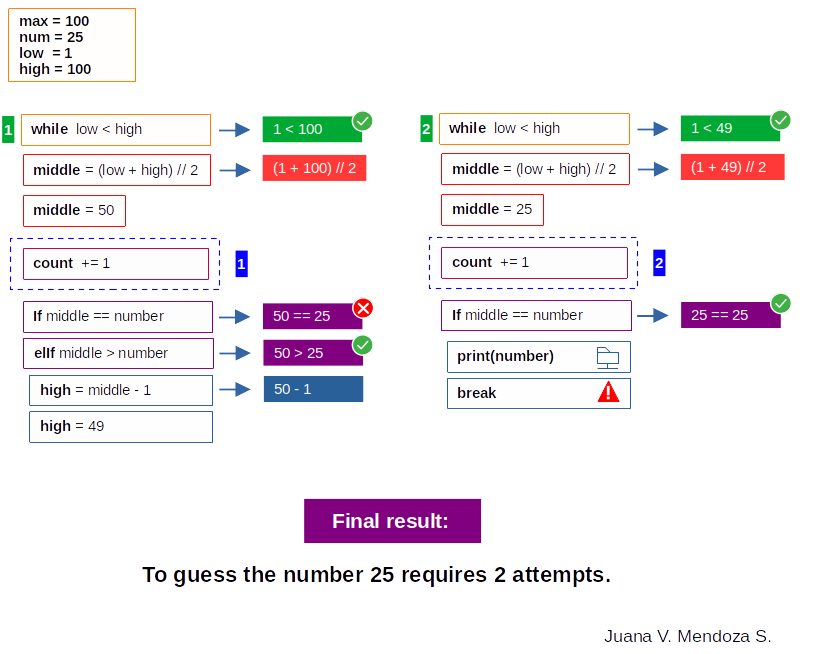

### Unit 26. Hash Table 
Thursday, March 02, 2023

<font color='blue'>Q1.</font> Clase HashTable para generar la clave hash de una cadena 

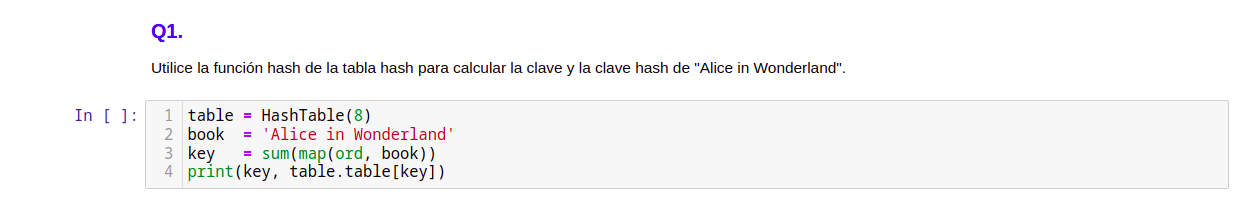

In [53]:
class HashTable:
    """ HashTable Class. 
    """
    #%%
    def __init__(self, size):
        """
        Default Constructor.

        Parameters
        ----------
        size : int
            Dict size.

        Returns
        -------
        None.

        """
        self._size  = size
        self._table = {}
        self.initialize_dict(size)
        
    #%%
    @property
    def size(self):
        """
        Getter for dict size.

        Parameters
        ----------
        None.

        Returns
        -------
        int: Dict size.

        """
        return self._size

    @size.setter
    def size(self, size):
        """
        Setter for dict size.

        Parameters
        ----------
        size : int
            Dict size.

        Returns
        -------
        String: The dict size.

        """
        self._size = size
        
    #%%
    @property
    def table(self):
        """
        Getter for table dict.

        Parameters
        ----------
        None.

        Returns
        -------
        Dict: Table dict.

        """
        return self._table

    @table.setter
    def table(self, table):
        """
        Setter for table dict.

        Parameters
        ----------
        table : int
            Table dict.

        Returns
        -------
        Dict: Table dict.

        """
        self._table = table
    
    #%%
    def initialize_dict(self, size):
        """
        Initialize the empty bucket with a specified size.
        
        Parameters
        ----------
        size : int
            Dict size
        
        Returns
        -------
        None.
        
        """
        for i in range(size):
            self.table[i] = []
    
    #%%
    def hash(self, key):
        """
        Get position in the bucket.
        
        Parameters
        ----------
        key: int
            ASCII value for the book name.
        
        Returns
        -------
        int: The position in the bucket.
        
        """
        return key % self.size
  
    #%%
    def get(self, key):
        """
        Get the content of the bucket key.
        
        Parameters
        ----------
        key: int
            ASCII value for the book name.
        
        Returns
        -------
        List: The bucket value list.
        
        """
        return self.table[self.hash(key)]

    #%%
    def put(self, key, value):
        """
        Add in bucket the key and value.
        
        Parameters
        ----------
        key: int
            ASCII value for the book name.
        value: String
            Book title.
        
        Returns
        -------
        None.
        
        """
        bucket = self.table[self.hash(key)]
        if value not in bucket:
            bucket.append(value)

In [54]:
# Initialize a Class HashTable object
table = HashTable(8)

# Get the ASCII code of the book name.
book = 'Alice in Wonderland'
key  = sum(map(ord, book))

# Store the key and value in the bucket. 
table.put(key, book)

# Show bucket.
for key in table.table.keys():
    print(key, table.table[key])

0 []
1 []
2 []
3 ['Alice in Wonderland']
4 []
5 []
6 []
7 []


<h3><font color='blue'>Graphic representation:</font></h3>

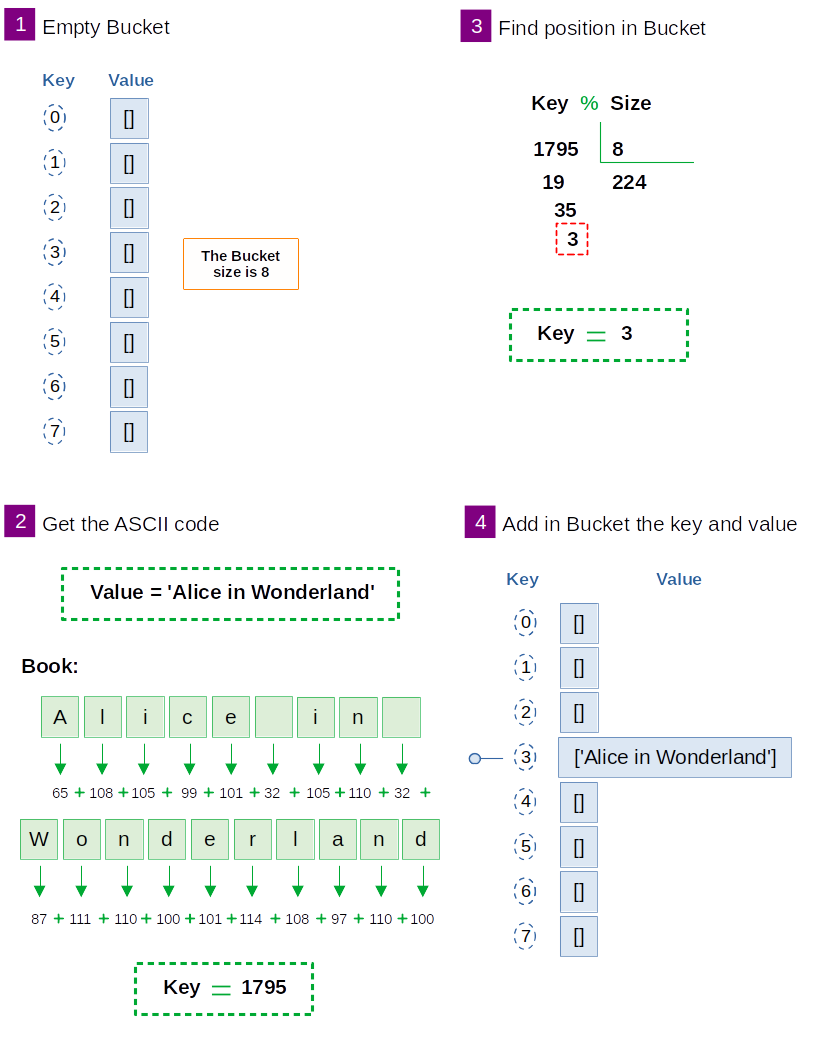

<font color='blue'>Q2.</font> Clase HashTable para generar la clave hash de una cadena. 

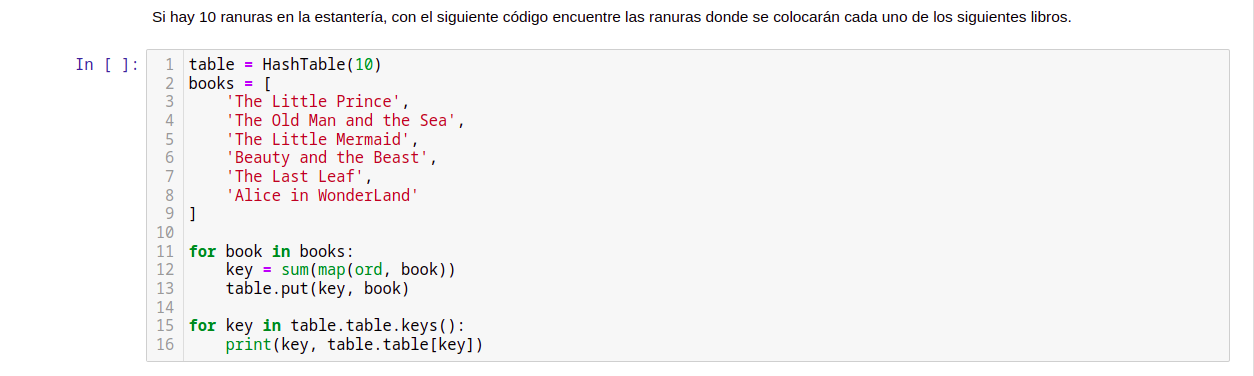

In [55]:
# Initialize a Class HashTable object
table = HashTable(10)

books = [
    'The Little Prince',
    'The Old Man and the Sea',
    'The Little Mermaid',
    'Beauty and the Beast',
    'The Last Leaf',
    'Alice in Wonderland'
]

for book in books:
    key = sum(map(ord, book))     # Get the ASCII code of the book name.
    table.put(key, book)          # Store the key and value in the bucket. 

# Show bucket.
for key in table.table.keys():
    print(key, table.table[key])

0 []
1 []
2 []
3 ['The Last Leaf']
4 ['The Little Prince']
5 ['Alice in Wonderland']
6 []
7 ['Beauty and the Beast']
8 ['The Little Mermaid']
9 ['The Old Man and the Sea']


<h3><font color='blue'>Graphic representation:</font></h3>

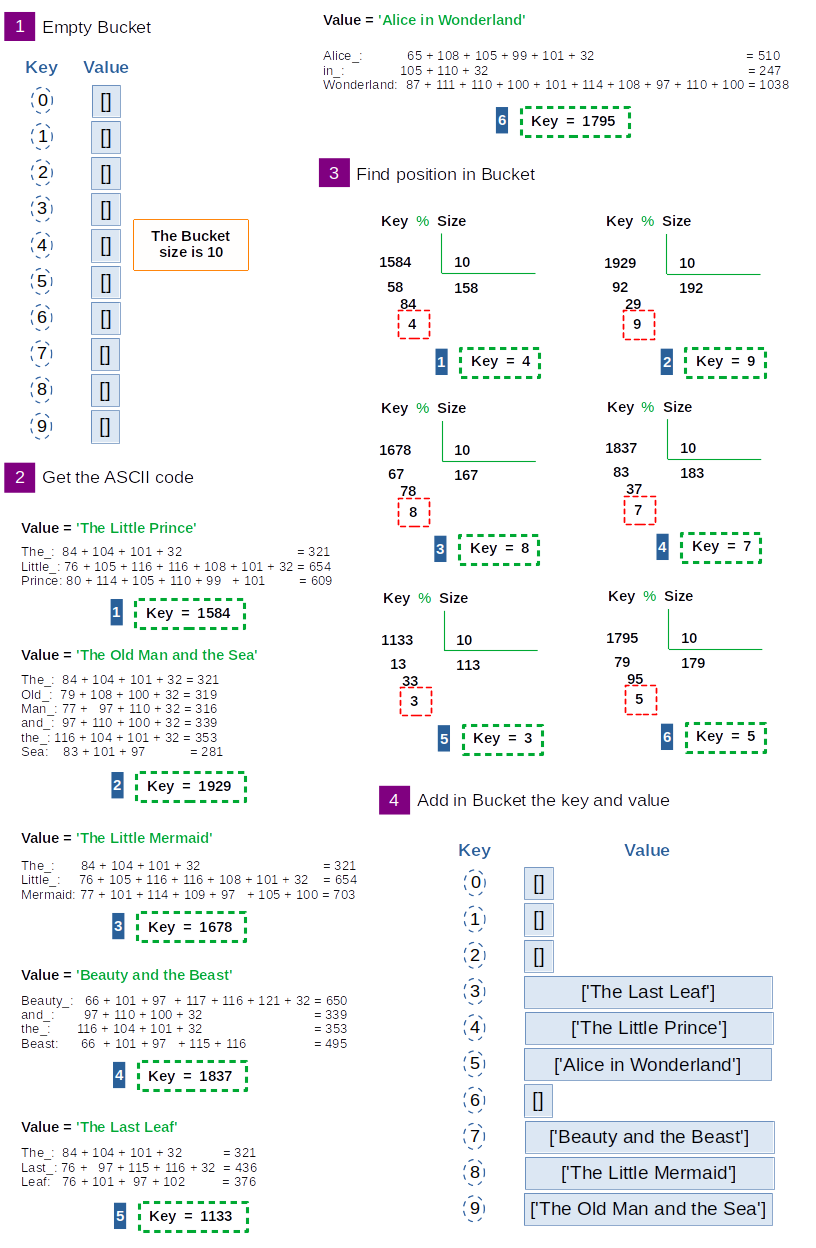